#Imports and Drive Mounting

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import numpy.random as random
import math
from scipy.interpolate import interp1d

#Data Import and Exploration

In [ ]:
data_directory = '/content/drive/MyDrive/CS/Datasets/fire-data.csv'

In [ ]:
db = pd.read_csv(data_directory)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
db.head()

,Call Type,Call Final Disposition,Unit Type,Received DtTm,Response DtTm,On Scene DtTm,Call Type Group,Neighborhood District,Location,elevation
0,Alarms,Fire,CHIEF,09/05/2014 03:15:13 AM,09/05/2014 03:20:30 AM,09/05/2014 03:24:11 AM,Alarm,Haight Ashbury,"(37.7695711762103, -122.449920089485)",79.011720
1,Structure Fire,Fire,TRUCK,10/29/2015 03:39:06 PM,10/29/2015 03:40:55 PM,10/29/2015 03:43:21 PM,Alarm,Financial District/South Beach,"(37.7995314468258, -122.401240243673)",6.142661
2,Medical Incident,Code 2 Transport,PRIVATE,12/11/2014 09:02:07 AM,12/11/2014 09:06:19 AM,12/11/2014 09:20:16 AM,Potentially Life-Threatening,Castro/Upper Market,"(37.7668035178194, -122.440704687809)",139.991000
3,Medical Incident,Code 2 Transport,ENGINE,06/15/2014 02:04:57 AM,06/15/2014 02:12:55 AM,06/15/2014 02:24:55 AM,Non Life-threatening,South of Market,"(37.7756902570435, -122.408609057895)",6.119534
4,Outside Fire,Fire,ENGINE,09/20/2015 08:15:00 PM,09/20/2015 08:18:07 PM,04/25/2016 01:08:14 PM,Fire,Mission,"(37.7751470741622, -122.419255607214)",17.060550


In [ ]:
db.columns = [c.replace(' ', '_') for c in db.columns]

In [ ]:
fire=db[db.Call_Final_Disposition=="Fire"]

In [ ]:
med=db[db.Call_Final_Disposition=="Code 2 Transport"]

In [ ]:
fire.head()

,Call_Type,Call_Final_Disposition,Unit_Type,Received_DtTm,Response_DtTm,On_Scene_DtTm,Call_Type_Group,Neighborhood__District,Location,elevation
0,Alarms,Fire,CHIEF,09/05/2014 03:15:13 AM,09/05/2014 03:20:30 AM,09/05/2014 03:24:11 AM,Alarm,Haight Ashbury,"(37.7695711762103, -122.449920089485)",79.011720
1,Structure Fire,Fire,TRUCK,10/29/2015 03:39:06 PM,10/29/2015 03:40:55 PM,10/29/2015 03:43:21 PM,Alarm,Financial District/South Beach,"(37.7995314468258, -122.401240243673)",6.142661
4,Outside Fire,Fire,ENGINE,09/20/2015 08:15:00 PM,09/20/2015 08:18:07 PM,04/25/2016 01:08:14 PM,Fire,Mission,"(37.7751470741622, -122.419255607214)",17.060550
13,Alarms,Fire,ENGINE,07/09/2015 12:37:01 PM,07/09/2015 12:39:39 PM,07/09/2015 12:40:32 PM,Alarm,Potrero Hill,"(37.7612904814523, -122.407255401788)",19.033320
17,Alarms,Fire,ENGINE,12/18/2014 03:05:24 PM,12/18/2014 03:06:21 PM,12/18/2014 03:09:04 PM,Alarm,Inner Richmond,"(37.7810182571422, -122.461592925475)",58.964840


In [ ]:
med.head()

,Call_Type,Call_Final_Disposition,Unit_Type,Received_DtTm,Response_DtTm,On_Scene_DtTm,Call_Type_Group,Neighborhood__District,Location,elevation
2,Medical Incident,Code 2 Transport,PRIVATE,12/11/2014 09:02:07 AM,12/11/2014 09:06:19 AM,12/11/2014 09:20:16 AM,Potentially Life-Threatening,Castro/Upper Market,"(37.7668035178194, -122.440704687809)",139.991000
3,Medical Incident,Code 2 Transport,ENGINE,06/15/2014 02:04:57 AM,06/15/2014 02:12:55 AM,06/15/2014 02:24:55 AM,Non Life-threatening,South of Market,"(37.7756902570435, -122.408609057895)",6.119534
5,Medical Incident,Code 2 Transport,MEDIC,04/03/2016 10:11:05 AM,04/03/2016 10:14:04 AM,04/03/2016 10:17:26 AM,Non Life-threatening,Outer Richmond,"(37.7732594685752, -122.510036956026)",8.601787
6,Medical Incident,Code 2 Transport,ENGINE,09/24/2014 03:07:36 PM,09/24/2014 03:11:28 PM,04/25/2016 01:14:55 PM,Potentially Life-Threatening,Excelsior,"(37.7188461081754, -122.439092837429)",55.136200
7,Medical Incident,Code 2 Transport,ENGINE,07/24/2015 05:45:39 PM,07/24/2015 05:51:14 PM,07/24/2015 05:52:56 PM,Potentially Life-Threatening,Noe Valley,"(37.7450456172368, -122.424347725679)",32.722660


#Data Formatting and Function Creation

In [ ]:
floc_list = []

for index, row in fire.iterrows(): 
  loc = row["Location"].replace(')','')
  loc = loc.replace('(','')
  loc = loc.split(',')
  floc_list.append(loc)


In [ ]:
fxp = []
fyp = []
for i in floc_list:
  fxp.append(float(i[0]))
  fyp.append(float(i[1]))

In [ ]:
ilist = np.arange(37.70, 37.82, .001)
jlist = np.arange(-122.52, -122.36, .00134)

print(len(ilist))
print(len(jlist))

120
120


In [ ]:
fxps = fxp[:2000]
fyps = fyp[:2000]

In [ ]:
def dist(x0,y0,x1,y1,x2,y2):
  d = abs(((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)))/math.sqrt((((x2-x1)**2)+((y2-y1)**2))) 
  return d

def distpoint(x1,y1,x2,y2):
  d = math.sqrt(((x2-x1)**2)+((y2-y1)**2))
  return d

#The Random Approach

In [ ]:
epoch = 999999
lr = 0.0001
fhlistx = []
fhlisty = []
fireamt = 5

for i in range(fireamt):
  x= random.uniform(37.70, 37.82)
  y= random.uniform(-122.52, -122.36)

  print('initial x:',x)
  print('initial y:', y)

  for j in range(epoch):
    randpoint = random.randint(0,len(fxps))
    xt = fxps[randpoint]
    yt = fyps[randpoint]

    if xt > x:
      x += xt*lr
    if xt < x:
      x -= xt*lr
    if yt < y:
      y += yt*lr
    if yt > y:
      y -= yt*lr
      
  print('final x', x)
  print('final y', y)
  fhlistx.append(x)
  fhlisty.append(y)

TypeError: ignored

Graphing

FIREHOUSE: 37.781097909307896 -122.4151362892716
FIREHOUSE: 37.77206840767086 -122.42210907480778
FIREHOUSE: 37.78312622779579 -122.42208762232438
FIREHOUSE: 37.7739943792765 -122.40979282371508
FIREHOUSE: 37.784384915160324 -122.40764951238341


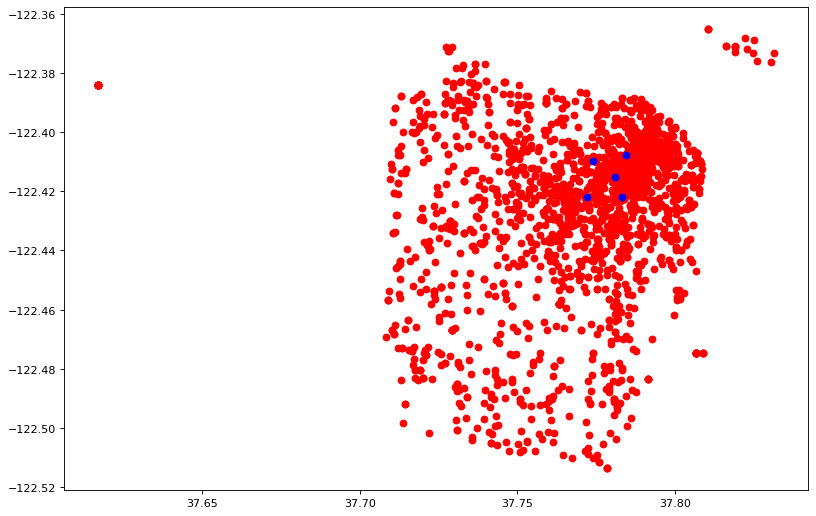

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(fxps, fyps, 'o',color='red')

plt.plot(fhlistx, fhlisty, 'o',color='blue') 

for i in zip(fhlistx, fhlisty):
  print('FIREHOUSE:', i[0], i[1])
plt.show()

#The Exhaustive Approach

For Firehouse

In [ ]:
def dist(x0,y0,x1,y1,x2,y2):
  d = abs(((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)))/math.sqrt((((x2-x1)**2)+((y2-y1)**2))) 
  return d

def distpoint(x1,y1,x2,y2):
  d = math.sqrt(((x2-x1)**2)+((y2-y1)**2))
  return d

fdist = 999999999
ilist = np.arange(min(fxps), max(fxps), .001)
jlist = np.arange(min(fyps), max(fyps), .00134)
for i in ilist: 
  for j in jlist:
    totaldist = 0 
    for pair in zip(fxps,fyps): 
      d = distpoint(pair[0],pair[1],i,j)
      totaldist += d
    if totaldist<=fdist:
      fdist = totaldist 
      print(fdist)
      fxpoint1 = i
      fypoint1 = j

179.2652950620459
178.61461326025
177.97167569650642
177.33656430644734
176.70936106243553
176.0901479364941
175.479006862234
174.87601969580592
174.28126817590075
173.69483388283098
173.11679819672466
172.54724225487254
171.98624690826023
171.43389267733463
170.8902597070445
170.3554277212075
169.8294759762459
169.31248321435314
168.80452761614004
168.30568675281742
167.81603753798095
167.33565617904983
166.86461812843092
166.40299803446862
165.95086969224405
165.50830599429867
165.07537888133922
164.6521592930011
164.2387171187365
163.8351211488939
163.4414390260638
163.05773719675392
162.68408086346471
162.32053393723578
161.96715899072854
161.62401721190673
161.29116835838983
160.96867071253416
160.65658103730527
160.35495453301127
160.06384479494082
159.78330377197452
159.51338172622343
159.254127193742
159.00558694637428
158.7678059547759
158.540827352668
158.32469240235687
158.11944046157402
157.92510895167118
157.74173332721335
157.56934704700652
157.4079815465967
157.257666212

In [ ]:
print(len(fxp))
print(len(fyp))

278155
278155


In [ ]:
mloc_list = []

for index, row in med.iterrows(): 
  loc = row["Location"].replace(')','')
  loc = loc.replace('(','')
  loc = loc.split(',')
  mloc_list.append(loc)

In [ ]:
mxp = []
myp = []

for i in mloc_list:
  mxp.append(float(i[0]))
  myp.append(float(i[1]))

In [ ]:
mxps = mxp[:2000]
myps = myp[:2000]

In [ ]:
print(len(mxp))
print(len(myp))

696445
696445


For Medical house

In [ ]:
def dist(x0,y0,x1,y1,x2,y2):
  d = abs(((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)))/math.sqrt((((x2-x1)**2)+((y2-y1)**2))) 
  return d

def distpoint(x1,y1,x2,y2):
  d = math.sqrt(((x2-x1)**2)+((y2-y1)**2))
  return d

fdist = 999999999
ilist = np.arange(min(mxps), max(mxps), .0001)
jlist = np.arange(min(myps), max(myps), .0001)
for i in ilist: 
  for j in jlist:
    totaldist = 0 
    for pair in zip(mxps,myps): 
      d = distpoint(pair[0],pair[1],i,j)
      totaldist += d 
    if totaldist<=fdist:
      fdist = totaldist 
      print(fdist)
      fxpoint2 = i
      fypoint2 = j

Streaming output truncated to the last 5000 lines.
41.39953483178374
41.399036897876634
41.39877189624724
41.398744537267206
41.39692789090269
41.392094565539146
41.38747378352538
41.38306465934184
41.37886672584399
41.37487981985295
41.371104001348684
41.36753949901796
41.36418667473137
41.361046001406706
41.35811805062024
41.35540348784008
41.352903074288996
41.350617675353995
41.34854827624857
41.34669600636569
41.3450621743924
41.34364831652285
41.342456259242766
41.34148819449458
41.340746755533026
41.340235062972226
41.339956684376396
41.33991543926919
41.33870953345135
41.33385151527742
41.32920546114469
41.324770643181594
41.320546771408814
41.3165338477585
41.312732077276536
41.30914181464634
41.30576353247371
41.3025978034231
41.299645291746465
41.29690675182709
41.29438303265249
41.29207508797877
41.28998399253298
41.28811096496074
41.28645739827377
41.28502489797726
41.28381532627781
41.28283084682768
41.282073957421396
41.28154748832542
41.28125453653295
41.28119831397621


Graphing

FIREHOUSE: 37.776882323924724 -122.41984835863607
MEDHOUSE: 37.77736480584179 -122.4172483586328


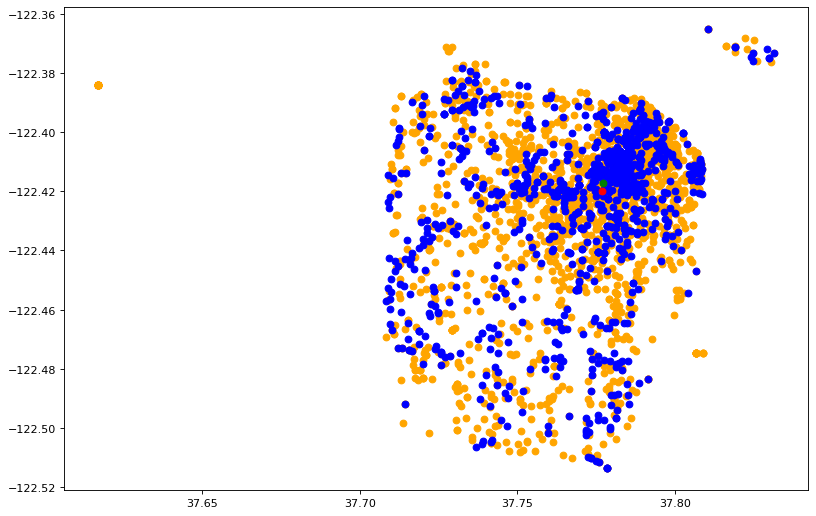

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(fxps, fyps, 'o',color='orange')

plt.plot(mxps, myps, 'o', color='blue')
plt.plot(fxpoint2, fypoint2, 'o',color='green')
plt.plot(fxpoint1, fypoint1, 'o',color='red') 
print('FIREHOUSE:', fxpoint1, fypoint1)
print('MEDHOUSE:', fxpoint2, fypoint2)
plt.show()